In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


%matplotlib inline


In [57]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')


In [58]:
combine = [ train_df, test_df]

passenger_id = test_df["PassengerId"]

In [59]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [60]:
print("Info")
train_df.info()


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:

print("Summary")
train_df.describe()


Summary


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:

print("SUM of NA")
train_df.isna().sum()


SUM of NA


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
for feature in ["Pclass", "Sex", "SibSp","Parch","Embarked"]:
    if(feature!= 'Survived'):
        print(train_df[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by="Survived", ascending=False))
        print("_"*50)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
__________________________________________________
      Sex  Survived
0  female  0.742038
1    male  0.188908
__________________________________________________
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
__________________________________________________
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
__________________________________________________
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
__________________________________________________


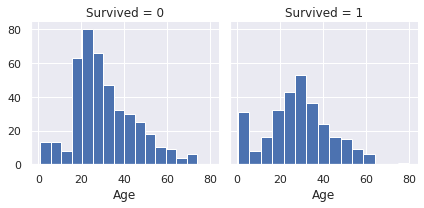

In [64]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', bins=15)

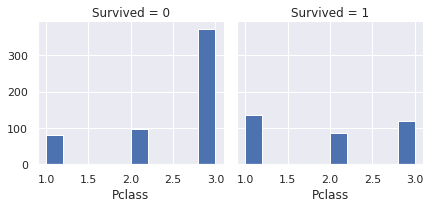

In [65]:
grid = sns.FacetGrid(train_df, col="Survived")
grid.map(plt.hist, 'Pclass')
grid.add_legend()

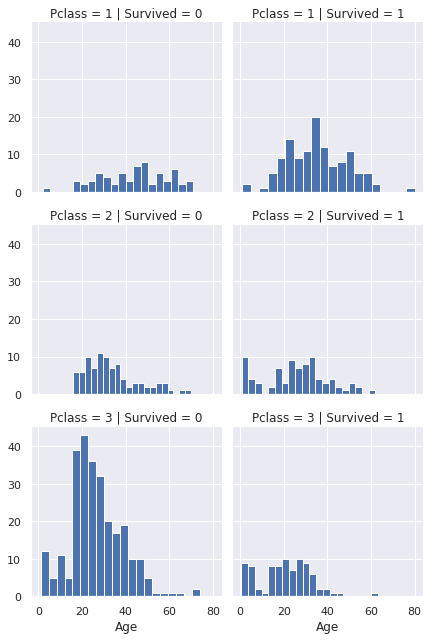

In [66]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

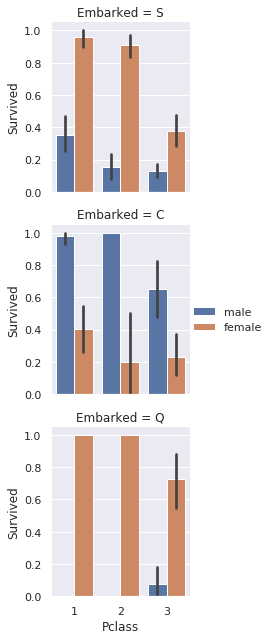

In [67]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.barplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

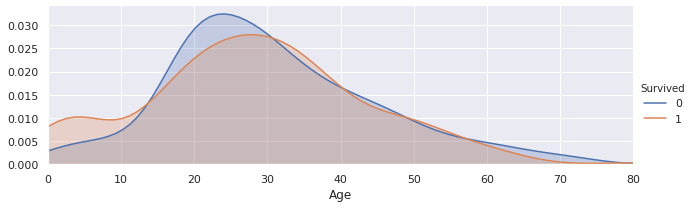

In [68]:
grid = sns.FacetGrid(train_df, hue='Survived', aspect=3)
grid.map(sns.kdeplot, 'Age', shade = True)
grid.set(xlim=(0, train_df['Age'].max()))
grid.add_legend()
plt.show()

In [69]:
# Binningg Data
combine_data = [train_df, test_df]
for dataset in combine_data:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 25), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 3,
    dataset.loc[ (dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 4,
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 5

In [70]:
for dataset in combine:
    display(dataset.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,5.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,NaN,S


In [71]:
### Getting the Titles out of The Names

for dataset in combine_data:
    dataset['Titles'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand = False)

In [72]:
train_df['Titles'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Sir           1
Lady          1
Countess      1
Capt          1
Mme           1
Don           1
Ms            1
Name: Titles, dtype: int64

In [73]:
## Mapping the names in the dataset

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }


for dataset in combine:
    dataset['Titles'] = dataset['Titles'].map(title_mapping)

In [74]:
title_mapping

{'Mr': 0,
 'Miss': 1,
 'Mrs': 2,
 'Master': 3,
 'Dr': 3,
 'Rev': 3,
 'Col': 3,
 'Major': 3,
 'Mlle': 3,
 'Countess': 3,
 'Ms': 3,
 'Lady': 3,
 'Jonkheer': 3,
 'Don': 3,
 'Dona': 3,
 'Mme': 3,
 'Capt': 3,
 'Sir': 3}

In [75]:
sex_mapping = {"male": 0, "female": 1}

for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

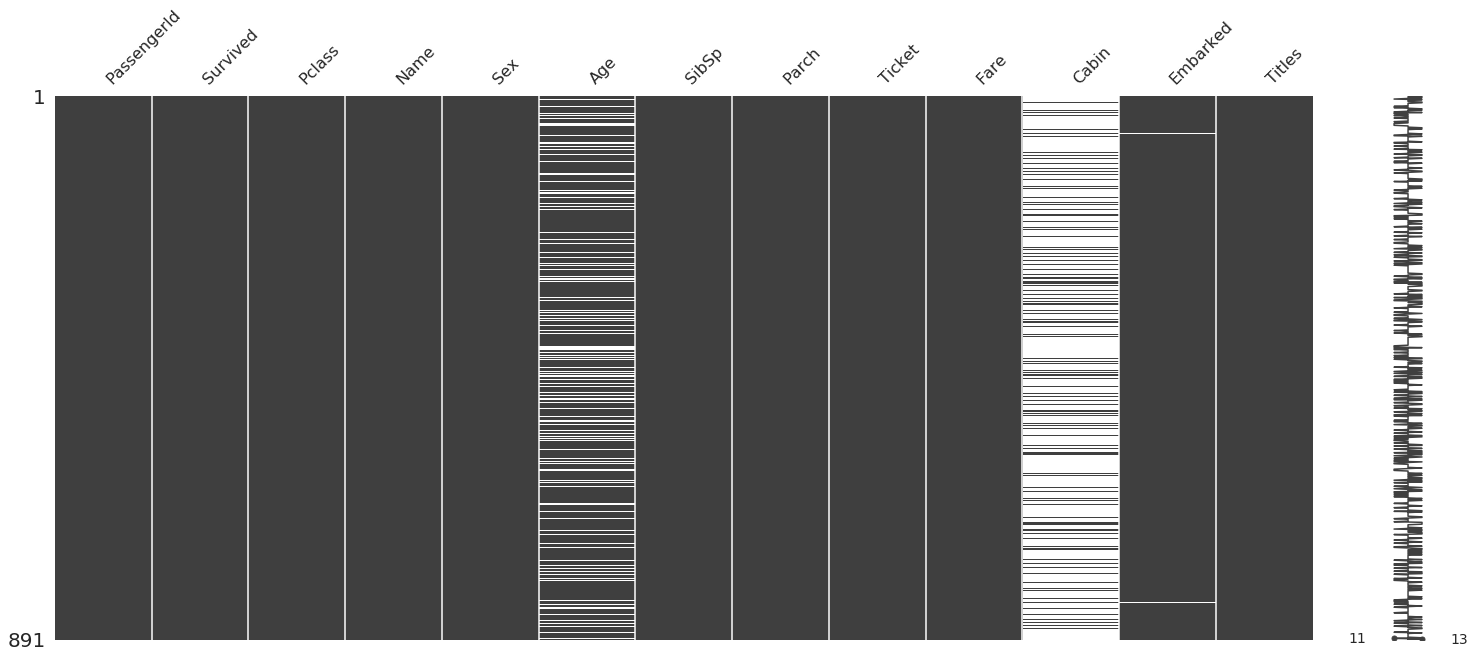

In [76]:
import missingno as msno

msno.matrix(train_df)

In [77]:
for dataset in combine:
    dataset["Age"].fillna(dataset.groupby("Titles")["Age"].transform("median"), inplace = True)

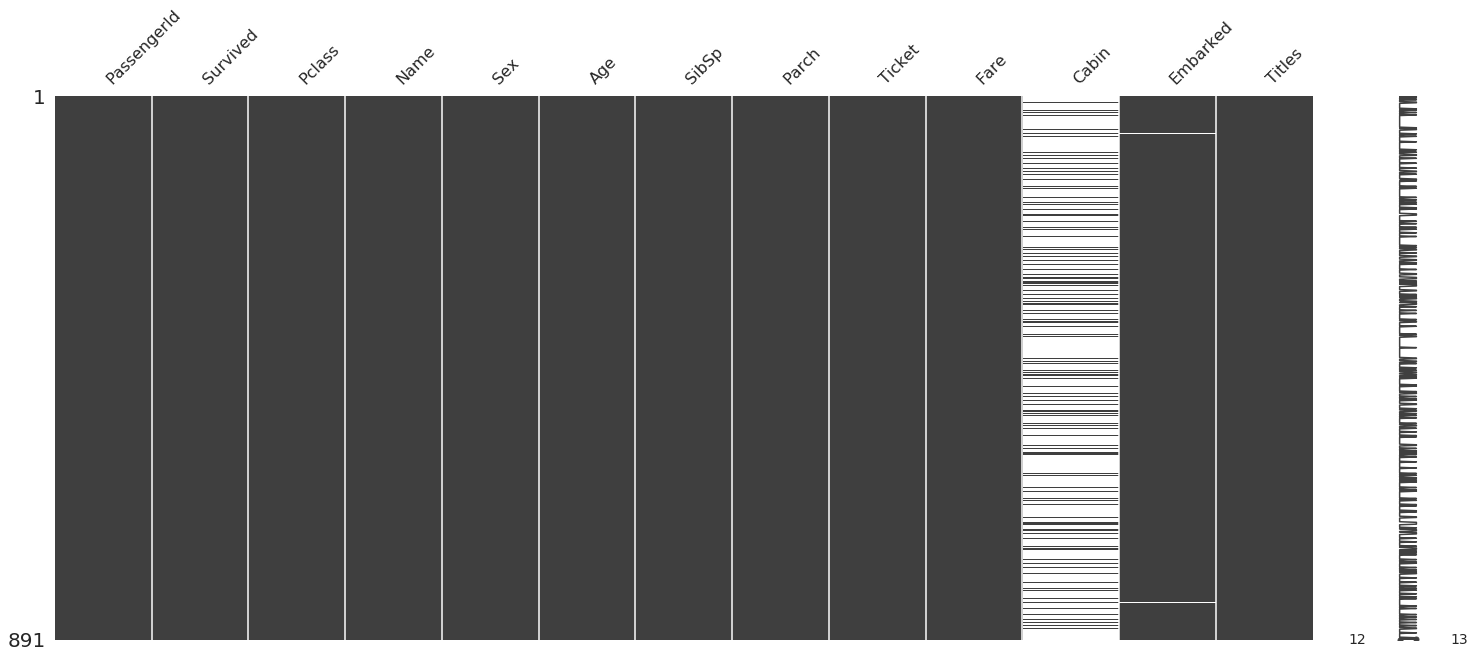

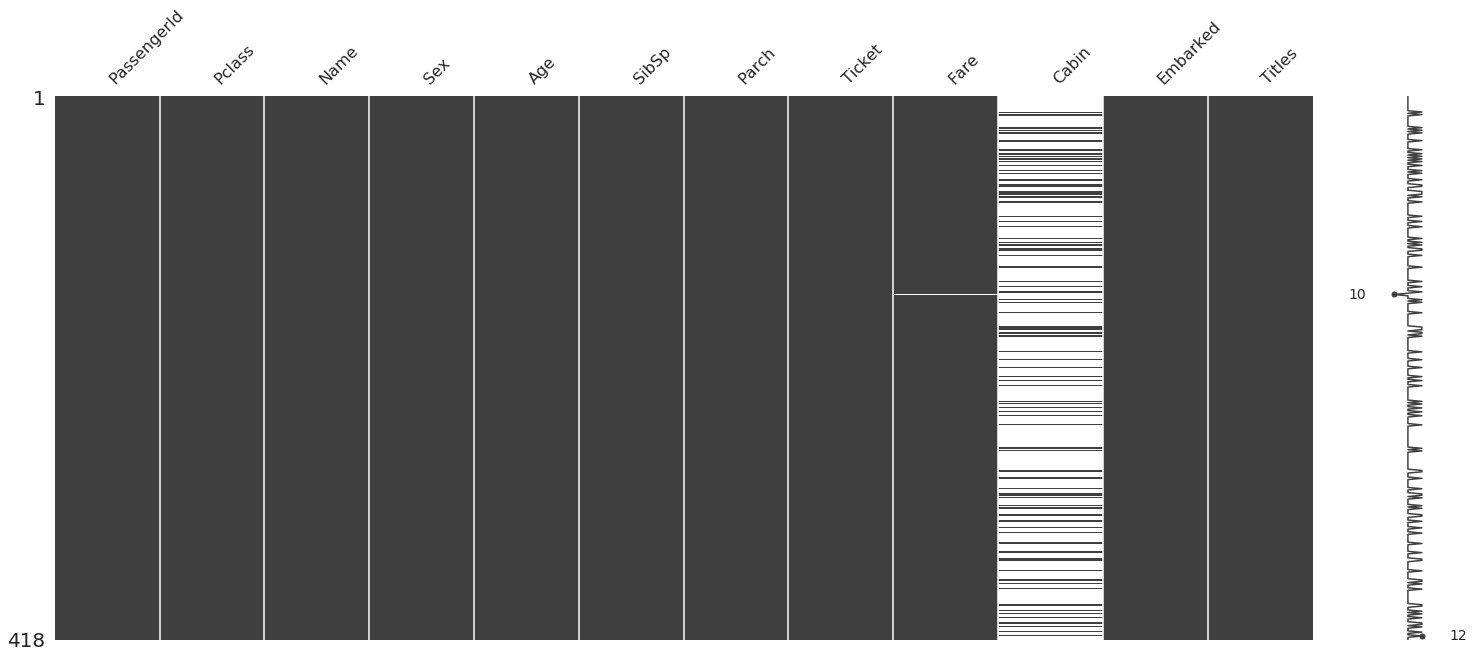

In [78]:
display(msno.matrix(train_df))
display(msno.matrix(test_df))

In [79]:
train_df["Embarked"] = train_df["Embarked"].fillna('S')
train_df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

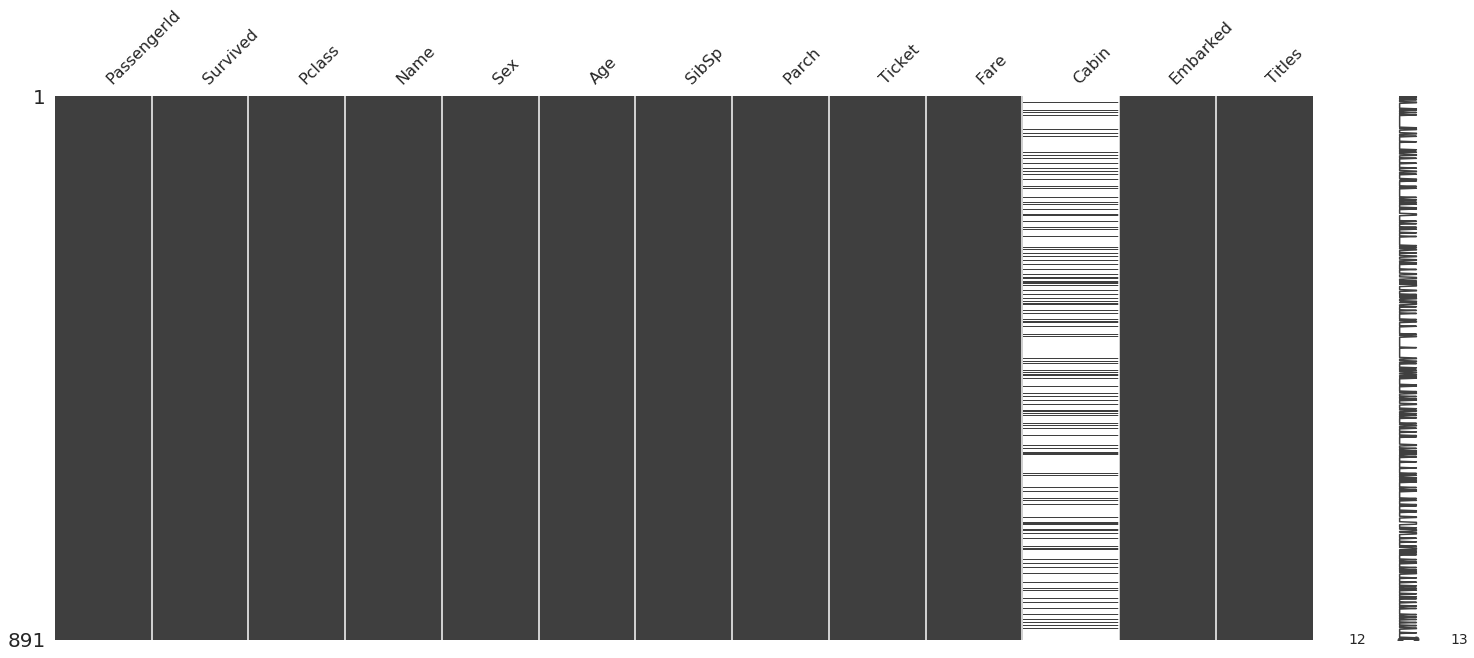

In [80]:
display(msno.matrix(train_df))


In [81]:
def embarked_encoder(x):
    if(x == 'S'):
        return 0
    elif(x == 'C'):
        return 1
    elif(x == 'Q'):
        return 2
    else:
        return x


In [82]:
train_df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [83]:

train_df["Embarked"] = train_df["Embarked"].map(lambda x: embarked_encoder(x))

test_df["Embarked"] = test_df["Embarked"].map(lambda x: embarked_encoder(x))


In [84]:
train_df["Embarked"].dtype

dtype('int64')

In [85]:
for dataset in combine:
    display(dataset.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,5.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,0,2


In [86]:


# fill missing Fare with median fare for each Pclass
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)



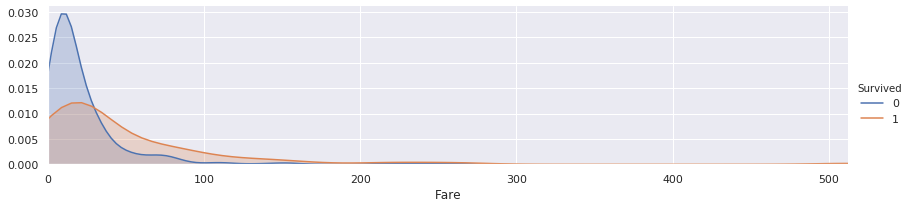

In [87]:
grid = sns.FacetGrid(train_df, hue="Survived",aspect=4)
grid.map(sns.kdeplot,'Fare',shade= True)
grid.set(xlim=(0, train_df['Fare'].max()))
grid.add_legend()


(0, 60)

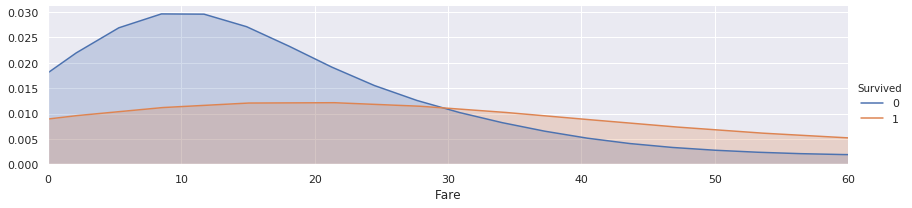

In [88]:
grid = sns.FacetGrid(train_df, hue="Survived",aspect=4)
grid.map(sns.kdeplot,'Fare',shade= True)
grid.set(xlim=(0, train_df['Fare'].max()))
grid.add_legend()
plt.xlim(0,60)

In [89]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [90]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0


In [91]:
## Family Size 
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1


(0, 11.0)

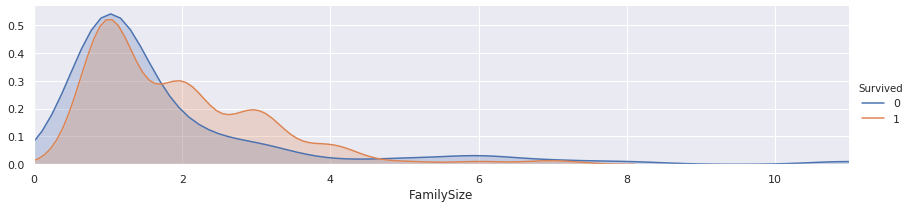

In [92]:


facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train_df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)



In [93]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in combine:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)


In [94]:
dataset['FamilySize'] 

0      0.0
1      0.4
2      0.0
3      0.0
4      0.8
5      0.0
6      0.0
7      0.8
8      0.0
9      0.8
10     0.0
11     0.0
12     0.4
13     0.4
14     0.4
15     0.4
16     0.0
17     0.0
18     0.4
19     0.0
20     0.4
21     0.4
22     0.0
23     0.4
24     1.6
25     0.4
26     0.4
27     0.0
28     0.0
29     0.8
30     0.4
31     0.8
32     1.2
33     1.2
34     0.4
35     0.0
36     0.0
37     0.0
38     0.0
39     0.0
40     0.4
41     0.0
42     0.0
43     0.0
44     0.4
45     0.0
46     0.0
47     0.0
48     0.0
49     0.8
50     0.4
51     0.0
52     1.2
53     2.0
54     0.0
55     2.0
56     0.0
57     0.0
58     0.4
59     0.0
60     0.0
61     0.0
62     0.0
63     0.0
64     1.6
65     0.0
66     0.0
67     0.0
68     0.0
69     2.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     0.8
78     0.0
79     0.0
80     0.8
81     0.4
82     0.0
83     0.0
84     0.0
85     0.4
86     0.0
87     0.0
88     0.0
89     0.8
90     0.4

In [95]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0,0.0


In [96]:
for dataset in combine:
    dataset.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin", "PassengerId"], axis= 1 , inplace=True)
    


In [97]:
for dataset in combine: 
    display(dataset.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,Titles,FamilySize
0,0,3,0,1.0,0.0,0,0,0.4
1,1,1,1,3.0,2.0,1,2,0.4
2,1,3,1,2.0,0.0,0,1,0.0
3,1,1,1,2.0,2.0,0,2,0.4
4,0,3,0,2.0,0.0,0,0,0.0


,Pclass,Sex,Age,Fare,Embarked,Titles,FamilySize
0,3,0,2.0,0.0,2,0,0.0
1,3,1,4.0,0.0,0,2,0.4
2,2,0,5.0,0.0,2,0,0.0
3,3,0,2.0,0.0,0,0,0.0
4,3,1,1.0,0.0,0,2,0.8


In [98]:
X = train_df.drop(["Survived"], axis=1 )
y = train_df["Survived"]

display(X.shape)
display(y.shape)


(891, 7)

(891,)

In [99]:
test_df["Embarked"].dtype


dtype('int64')

In [100]:
## Data Modelling and Prediction
import numpy as numpy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [101]:
log_model = LogisticRegression()

log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
log_model.score(X,y)

0.819304152637486

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


display('Average Score is of KNN {0}'.format(round(np.mean(score)*100), 2))

[0.78888889 0.76404494 0.82022472 0.80898876 0.83146067 0.83146067
 0.79775281 0.80898876 0.80898876 0.79775281]


'Average Score is of KNN 81.0'

In [104]:
### SVm 
from sklearn.svm import SVC
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
display('Average Score of SVM {0}'.format(round(np.mean(score)*100), 2))

[0.83333333 0.79775281 0.82022472 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.84269663]


'Average Score of SVM 83.0'

In [105]:
clf = SVC()
clf.fit(X, y)

prediction = clf.predict(test_df)


In [106]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [107]:
submission = pd.DataFrame({
    "PassengerId" : passenger_id,
    "Survived": prediction
})

In [108]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [109]:
submission.to_csv('mysubmissionSVC.csv', index=False)